In [1]:
#import libraries

from nltk.tokenize import sent_tokenize
from nltk.tokenize.treebank import TreebankWordTokenizer
import nltk
import glob
from pathlib import Path
import os
import gensim
import pandas as pd
from gensim.models import Word2Vec
from tqdm import tqdm
import multiprocessing

In [2]:
import os
base_dir_T = "/media/secure_volume/Temple/"
all_docs_T = []
docs_T = os.listdir(base_dir_T)

In [3]:
#checking i can read through
for doc in docs_T:
    filename_T = os.fsdecode(doc)
    if not doc.startswith('.'):
        print(os.path.join(base_dir_T, filename_T))

/media/secure_volume/Temple/ppt.ssfcbz201710000333.txt
/media/secure_volume/Temple/ppt.ssfcbz201808000173.txt
/media/secure_volume/Temple/ppt.ssfcbz201808000121.txt
/media/secure_volume/Temple/ppt.ssfcbz201808000172.txt
/media/secure_volume/Temple/ppt.ssfcbz201808000124.txt
/media/secure_volume/Temple/ppt.ssfcbz201808000185.txt
/media/secure_volume/Temple/ppt.ssfcbz201710000393.txt
/media/secure_volume/Temple/ppt.ssfcbz201710000415.txt
/media/secure_volume/Temple/ppt.ssfcbz201710000401.txt
/media/secure_volume/Temple/ppt.ssfcbz201808000129.txt
/media/secure_volume/Temple/ppt.ssfcbz201808000200.txt
/media/secure_volume/Temple/ppt.ssfcbz201710000330.txt
/media/secure_volume/Temple/ppt.ssfcbz202002001078.txt
/media/secure_volume/Temple/ppt.ssfcbz201808000184.txt
/media/secure_volume/Temple/ppt.ssfcbz202002001124.txt
/media/secure_volume/Temple/ppt.ssfcbz201710000336.txt
/media/secure_volume/Temple/ppt.ssfcbz201710000441.txt
/media/secure_volume/Temple/ppt.ssfcbz202002001129.txt
/media/sec

In [4]:
#checking number of files is correct
for doc in docs_T:
    if not doc.startswith('.'):
        with open(base_dir_T + doc, "r", encoding="utf-8") as file:
            text_T = file.read()
            all_docs_T.append(text_T)
            

len(all_docs_T)

322

In [8]:
#setting up tokenizer

tokenizer = TreebankWordTokenizer()
files_T = glob.glob(f"{base_dir_T}/.txt")
titles_T = [Path(file).stem for file in files_T]

In [9]:
#tokenizer function

def make_sentences_T(list_text):
    all_txt_T = []
    counter = 0
    for txt in tqdm(list_text, desc="Preprocessing"):
        lower_txt = txt.lower()
        sentences_T = sent_tokenize(lower_txt)
        sentences_T = [tokenizer.tokenize(sent) for sent in sentences_T]
        all_txt_T += sentences_T
        counter += 1
    return all_txt_T

In [7]:
#preprocessing
sentences_T = make_sentences_T(all_docs_T)

Preprocessing: 100%|██████████████████████████| 322/322 [04:17<00:00,  1.25it/s]


In [10]:
os.cpu_count()

49

In [11]:
Temple_model=gensim.models.Word2Vec(
sentences_T,
min_count=2,
vector_size=300,
workers=48)

In [12]:
Temple_model.save("Temple_model")

In [5]:
#to reload model

from gensim.models import Word2Vec
Temple_model= Word2Vec.load("Temple_model")

In [13]:
Temple_model.wv.most_similar("river", topn=5)

[('lake', 0.8443195819854736),
 ('valley', 0.8115717768669128),
 ('shore', 0.7808051705360413),
 ('meadow', 0.7702177166938782),
 ('lagoon', 0.7609250545501709)]

In [14]:
Temple_model.wv.most_similar("creek", topn=5)

[('canyon', 0.765004575252533),
 ('river', 0.7544195055961609),
 ('lake', 0.753101646900177),
 ('shore', 0.7435128688812256),
 ('valley', 0.7433123588562012)]

In [15]:
Temple_model.wv.most_similar("toxic", topn=5)

[('poisonous', 0.658000648021698),
 ('radioactive', 0.6540186405181885),
 ('poisoning', 0.6292588114738464),
 ('dna', 0.6286035776138306),
 ('fission', 0.6280390024185181)]

In [16]:
Temple_model.wv.most_similar("water", topn=5)

[('liquid', 0.6904925107955933),
 ('moisture', 0.6424208879470825),
 ('sand', 0.6394728422164917),
 ('waters', 0.6325480341911316),
 ('fluid', 0.6283563375473022)]

In [17]:
Temple_model.wv.most_similar("polluted", topn=5)

[('conditioners', 0.6909869313240051),
 ('stagnant', 0.6671688556671143),
 ('humid', 0.6599342823028564),
 ('breathable', 0.6483432054519653),
 ('greenness', 0.6370236277580261)]

In [18]:
Temple_model.wv.most_similar("pollution", topn=5)

[('prevailing', 0.7024636268615723),
 ('conditioning', 0.6621903777122498),
 ('warfare', 0.6612007021903992),
 ('distribution', 0.6611322164535522),
 ('global', 0.6533108353614807)]

In [19]:
Temple_model.wv.most_similar("catastrophe", topn=5)

[('disaster', 0.8410323262214661),
 ('crisis', 0.7520735263824463),
 ('mutation', 0.7386900782585144),
 ('tragedy', 0.735249936580658),
 ('destruction', 0.7306077480316162)]

In [20]:
Temple_model.wv.most_similar("forest", topn=5)

[('jungle', 0.8591517210006714),
 ('woods', 0.8165491223335266),
 ('forests', 0.778739869594574),
 ('desert', 0.7695292830467224),
 ('mountains', 0.7519630193710327)]

In [21]:
Temple_model.wv.similarity('water','toxic')

0.2637642

In [22]:
Temple_model.wv.similarity('creek', 'toxic')

0.06200479

In [23]:
Temple_model.wv.similarity('stream', 'toxic')

0.17416057

In [24]:
Temple_model.wv.similarity('river', 'toxic')

0.09121783

In [25]:
Temple_model.wv.similarity('air', 'toxic')

0.17407505

In [26]:
Temple_model.wv.similarity('polluted', 'toxic')

0.3769074

In [27]:
Temple_model.wv.similarity('forest', 'toxic')

0.14722423

In [29]:
Temple_model.wv.similarity('river','sewer')

0.5350743

In [30]:
Temple_model.wv.similarity('pollutants','seawater')

0.49321002

In [31]:
Temple_model.wv.similarity('stream','poisonous')

0.31917512

In [32]:
Temple_model.wv.similarity('radioactive','rainwater')

0.36249715

In [33]:
Temple_model.wv.similarity('pollution','river')

0.124166995

In [34]:
Temple_model.wv.similarity('ocean','sewer')

0.51615894

In [35]:
result = Temple_model.wv.most_similar(positive=['river', 'canal'], negative=['ocean'])
print("{}: {:.4f}".format(*result[0]))

highway: 0.7481


In [36]:
result = Temple_model.wv.most_similar(positive=['river', 'sewage'], negative=['ocean'])
print("{}: {:.4f}".format(*result[0]))

fetid: 0.5390


In [37]:
result = Temple_model.wv.most_similar(positive=['water', 'toxic'], negative=['air'])
print("{}: {:.4f}".format(*result[0]))

spice: 0.5336


In [38]:
result = Temple_model.wv.most_similar(positive=['river', 'flood'], negative=['air'])
print("{}: {:.4f}".format(*result[0]))

lake: 0.5806


In [39]:
result = Temple_model.wv.most_similar(positive=['creek', 'sewer'], negative=['ocean'])
print("{}: {:.4f}".format(*result[0]))

driveway: 0.6685


In [40]:
result = Temple_model.wv.most_similar(positive=['river', 'polluted'], negative=['ocean'])
print("{}: {:.4f}".format(*result[0]))

sluiced: 0.5503


In [41]:
from sklearn.manifold import TSNE
import numpy as np
from matplotlib import pyplot as plt

In [42]:
#PLOT STARTS HERE

base_words = ['toxic', 'pollution', 'river', 'water']
toxic_similar_T = [i[0] for i in Temple_model.wv.most_similar(positive='toxic', topn=5)]
pollution_similar_T = [i[0] for i in Temple_model.wv.most_similar(positive='pollution', topn=5)]
river_similar_T = [i[0] for i in Temple_model.wv.most_similar(positive='river', topn=5)]
water_similar_T = [i[0] for i in Temple_model.wv.most_similar(positive='water', topn=5)]

In [43]:
#combine lists
all_words_T = np.hstack((toxic_similar_T, pollution_similar_T, river_similar_T, water_similar_T, base_words))
print(all_words_T)

['poisonous' 'radioactive' 'poisoning' 'dna' 'fission' 'prevailing'
 'conditioning' 'warfare' 'distribution' 'global' 'lake' 'valley' 'shore'
 'meadow' 'lagoon' 'liquid' 'moisture' 'sand' 'waters' 'fluid' 'toxic'
 'pollution' 'river' 'water']


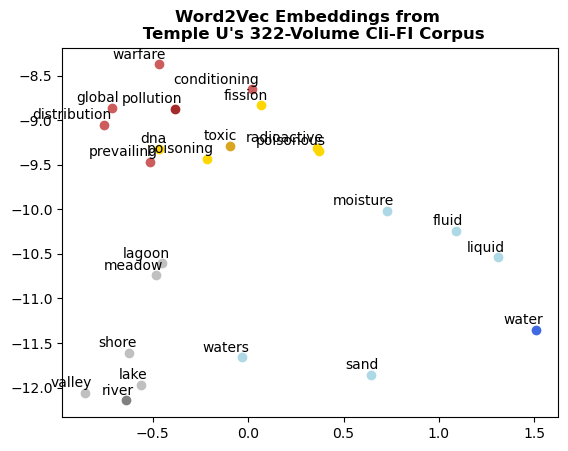

In [45]:
#plot with color coding

labels = [i for i in all_words_T]
tokens = Temple_model.wv[labels]

tsne_model = TSNE(init='pca', learning_rate='auto', perplexity=15)
new_values = tsne_model.fit_transform(tokens)

x= []
y= []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
    
for word in all_words_T:
    i=labels.index(word)
    plt.annotate(labels[i],
                xy=(x[i], y[i]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom')
    if word in toxic_similar_T:
        plt.scatter(x[i], y[i], color='gold')
    elif word == 'toxic':
         plt.scatter(x[i], y[i], color='goldenrod')
    elif word in pollution_similar_T:
         plt.scatter(x[i], y[i], color='indianred')
    elif word == 'pollution':
         plt.scatter(x[i], y[i], color='brown')
    elif word in river_similar_T:
         plt.scatter(x[i], y[i], color='silver')
    elif word == 'river':
         plt.scatter(x[i], y[i], color='grey')
    elif word in water_similar_T:
         plt.scatter(x[i], y[i], color='lightblue')
    elif word == 'water':
        plt.scatter(x[i], y[i], color='royalblue')
    plt.title("Word2Vec Embeddings from \n Temple U's 322-Volume Cli-FI Corpus", fontweight='bold' )